# Data Visualization- Countplots, Bar plots and Histograms

#### Clone this repository to get the dataset

## Let's get going!

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data from .csv

df = pd.read_csv('countries.csv')

In [3]:
df.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         1704 non-null   object 
 1   continent       1704 non-null   object 
 2   year            1704 non-null   int64  
 3   lifeExpectancy  1704 non-null   float64
 4   population      1704 non-null   int64  
 5   gdpPerCapita    1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# Let's Visualize the data

In [5]:
print('Shape: ',df.shape)
print()
print('Columns: ', list(df.columns))

Shape:  (1704, 6)

Columns:  ['country', 'continent', 'year', 'lifeExpectancy', 'population', 'gdpPerCapita']


In [6]:
# Top 10 countries by Population in 2007

data_2007=df[df.year==2007]
data_2007.head()

top10=data_2007.sort_values('population',ascending=False).head(10)
top10

,country,continent,year,lifeExpectancy,population,gdpPerCapita
299,China,Asia,2007,72.961,1318683096,4959.114854
707,India,Asia,2007,64.698,1110396331,2452.210407
1619,United States,Americas,2007,78.242,301139947,42951.653090
719,Indonesia,Asia,2007,70.650,223547000,3540.651564
179,Brazil,Americas,2007,72.390,190010647,9065.800825
1175,Pakistan,Asia,2007,65.483,169270617,2605.947580
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792
1139,Nigeria,Africa,2007,46.859,135031164,2013.977305
803,Japan,Asia,2007,82.603,127467972,31656.068060
995,Mexico,Americas,2007,76.195,108700891,11977.574960


# Time Series

## GDP Per Capita Growth in the United States

In [7]:
us=df[df.country=='United States']
us.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
1608,United States,Americas,1952,68.44,157553000,13990.48208
1609,United States,Americas,1957,69.49,171984000,14847.12712
1610,United States,Americas,1962,70.21,186538000,16173.14586
1611,United States,Americas,1967,70.76,198712000,19530.36557
1612,United States,Americas,1972,71.34,209896000,21806.03594


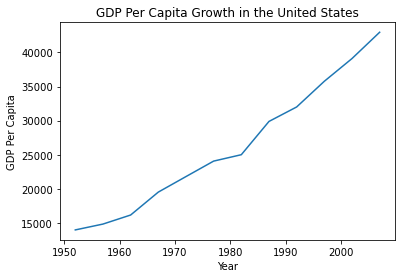

In [8]:
plt.plot(us.year,us.gdpPerCapita)
plt.title("GDP Per Capita Growth in the United States")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.show()

## GDP Per Capita Growth in the China

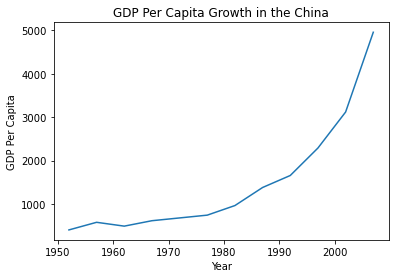

In [9]:
china=df[df.country=='China']
china.head()

plt.plot(china.year,china.gdpPerCapita)
plt.title("GDP Per Capita Growth in the China")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.show()

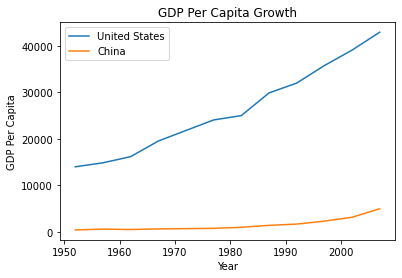

In [10]:
plt.plot(us.year,us.gdpPerCapita,label="United States")
plt.title("GDP Per Capita Growth")
plt.xlabel("Year")
plt.ylabel("GDP Per Capita")
plt.plot(china.year,china.gdpPerCapita,label="China")
plt.legend()
plt.show()

# Bar plot

## Top 10 Populous Country

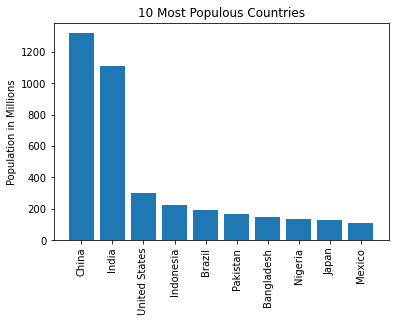

In [11]:
x=range(10)
plt.bar(x,top10.population/10**6)
plt.xticks(x,top10.country,rotation='vertical')
plt.title("10 Most Populous Countries")
plt.ylabel("Population in Millions")
plt.show()

# Double Bar Graph

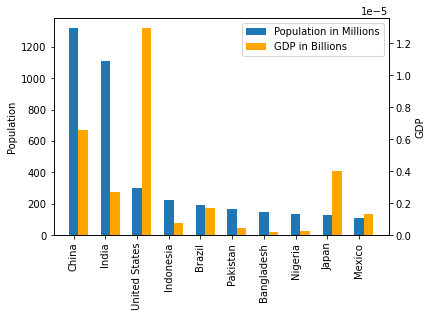

In [12]:
gdp=top10.gdpPerCapita*top10.population/10**9

x=np.arange(10)

# We need to create subplots in order to overlay two bar plots
# with proper axes on the left hand side and the right hand side.
fig,ax1=plt.subplots()

width=0.3 # width of bar in the graph
plt.xticks(x,top10.country,rotation='vertical')
population=ax1.bar(x,top10.population/10**6,width)
plt.ylabel("Population")

# ax1.twinx() gives us the same x-axis with the y-axis on the right.
ax2 = ax1.twinx()
GDP = ax2.bar(x + width,gdp/ 10**9,width, color='orange')
plt.ylabel('GDP')
plt.legend([population, GDP],
           ['Population in Millions', 'GDP in Billions'])
figure = plt.gcf() # get current figure
plt.show()

# Histogram

## Comparison of Europe and America Life Expectancy in 1997

In [13]:
data_1997=df[df.year==1997]
europe_1997=data_1997[data_1997.continent=='Europe']
america_1997=data_1997[data_1997.continent=='Americas']

In [14]:
print("Mean Life Expectancy Europe:")
print(europe_1997.lifeExpectancy.mean())
print("Mean Life Expectancy Americas:")
print(america_1997.lifeExpectancy.mean())
print("Median Life Expectancy Europe:")
print(europe_1997.lifeExpectancy.median())
print("Median Life Expectancy America:")
print(america_1997.lifeExpectancy.median())

Mean Life Expectancy Europe:
75.50516666666667
Mean Life Expectancy Americas:
71.15048
Median Life Expectancy Europe:
76.116
Median Life Expectancy America:
72.146


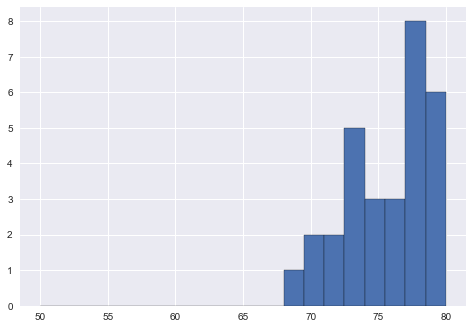

In [15]:
# Life Expectancy in Europe
plt.style.use('seaborn')
plt.hist(europe_1997.lifeExpectancy,20,range=(50,80),edgecolor='black')
plt.show()

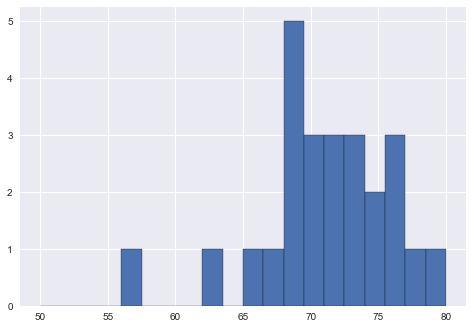

In [16]:
# Life Expectancy in America
plt.style.use('seaborn')
plt.hist(america_1997.lifeExpectancy,20,range=(50,80),edgecolor='black')
plt.show()

### Plotting them in the same figure

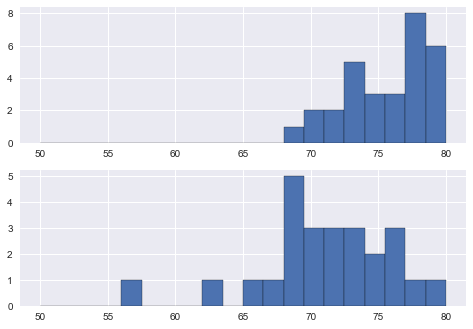

In [17]:
plt.style.use('seaborn')
plt.subplot(2,1,1)
plt.hist(europe_1997.lifeExpectancy,20,range=(50,80),edgecolor='black')
plt.subplot(2,1,2)
plt.hist(america_1997.lifeExpectancy,20,range=(50,80),edgecolor='black')
plt.show()

# Countplot

## Count for number of countries by continent

In [18]:
# Using the 2007 data
data_1997=df[df.year==1997]

<AxesSubplot:xlabel='continent', ylabel='count'>

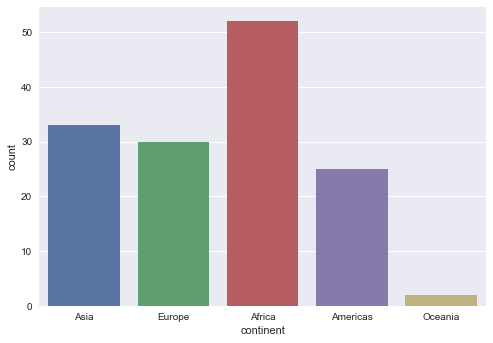

In [19]:
sns.countplot(x='continent',data=data_1997)